In [3]:
num_defects =  [99, 52, 42, 44, 27, 22, 22, 24, 22, 21,
                21, 18, 18, 15, 19, 19, 18, 17, 18, 16,
                16, 17, 18, 15, 15, 13, 11, 14, 14, 13,
                14, 14, 14, 13, 14, 14, 14, 14, 12, 14,
                13, 12, 11, 12, 13, 13, 12, 13, 11, 13,
                11, 12, 12, 10, 10, 11, 12, 13, 10, 12,
                11, 10, 12, 12, 11, 11, 9, 9, 9, 11,
                12, 8, 8, 10, 8, 10, 11, 10, 9, 10,
                10, 8, 8, 11, 10, 9, 8, 8, 10, 10,
                7, 7, 7, 8, 8, 7, 7, 8, 7, 7,
                9, 7, 7, 10, 7, 8, 9, 9, 6, 6,
                8, 8, 9, 7, 7, 9, 6, 8, 9, 8,
                9, 9, 6, 8, 9, 7, 8, 6, 8, 6,
                6, 6, 6, 6, 6, 8, 7, 8, 7, 5,
                6, 8, 8, 8, 8, 5, 4, 6, 6, 4,
                6, 6, 4, 5, 7, 5, 7, 6, 5, 4,
                6, 4, 7, 5, 6, 4, 4, 6, 6, 3,
                5, 6, 6, 4, 6, 3, 3, 3, 5, 5,
                5, 3, 2, 5, 2, 3, 2, 4, 3, 2,
                5, 2, 2, 2, 3, 4, 4, 4, 5, 5,
                3, 5, 4, 2]

In [4]:
# The following enables inline plots
# and import matplotlib.pyplot uses plt as an alias

%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# importing the Counter class helps us simplify the counting process

from collections import Counter

In [6]:
def data_range(x):
    """
    Returns the range (i.e. the difference) between the highest and lowest values
    :param x:
    :return:
    """

    return max(x) - min(x)

In [7]:
data_range([5, 3, 4, 2, 1])

4

In [8]:
data_range(num_defects)

97

In [9]:
def quantile(values, percentile):
    """
    Returns the pth-percentile value in a sequence of values
    :param values:
    :param percentile:
    :return:
    """

    p_index = int(len(values) * percentile)
    return sorted(values)[p_index]

In [10]:
# Given a sequence of values, we can calculate a given quantile.
# In this case, we calculate the quantile at the halfway mark (50% OR 0.5)
#     or roughly the median.

grades1 = [85, 87, 89, 55, 65, 67, 75, 80, 91, 96]        # ten values

quantile(grades1, .5)

85

In [11]:
grades2 = [85, 87, 89, 55, 65, 67, 75, 80, 91, 96, 99]    # eleven values

quantile(grades2, .5)

# NOTE: As described above, this function lacks some details
#     it is less detailed than even our median function
#     and does NOT account for the length of the dataset in
#     terms of odd/even num of values

85

In [12]:
# While not as sophisticated as our median calc,
#     we can generally calculate other quantiles, such as the
#     the 25th percentile
#     or the 75th percentile
#     i.e. the quartiles

print('25%: ', quantile(grades2, .25))
print('75%: ', quantile(grades2, .75))

# sorted for comparison: [55, 65, 67, 75, 80, 85, 87, 89, 91, 96, 99]

25%:  67
75%:  91


In [13]:
for percent in [0.10, 0.25, 0.75, 0.90, 0.999]:
    q = quantile(num_defects, percent)

    print('Percent: {}\t{}'.format(percent, q))

Percent: 0.1	4
Percent: 0.25	6
Percent: 0.75	12
Percent: 0.9	16
Percent: 0.999	99


In [14]:
def interquartile_range(values, upper_bound=0.75, lower_bound=0.25):
    """
    Return the difference between the 75% and 25% percentiles
    :param values:
    :return:
    """

    return quantile(values, upper_bound) - quantile(values, lower_bound)

In [15]:
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Let's first just confirm the quantile VALUES at the 25% and 75% cut points
print(quantile(values, 0.25), '<->', quantile(values, 0.75))

3 <-> 8


In [16]:
# Now, let's calculate the interquartile range

print(interquartile_range(values))

5


In [17]:
# We can calculate the interquartile range for our defects data (presuming 75% and 25%)

interquartile_range(num_defects)

6

In [18]:
def mean(values):
    """
    Return the mean (or average) of a sequence of values.

    >>> mean([1, 2, 3, 4])
    2.5

    >>> mean([1, 2, 3, 4, 5])
    3.0

    """
    return sum(values) / len(values)

In [19]:
def diff_mean(values):
    """
    Calculate the difference from the mean for every value in a sequence of values
    :param values:
    :return:
    """

    x_bar = mean(values)
    return [value - x_bar for value in values]

In [20]:
def variance(values):
    """
    Return the variance of a sequence of values.

    NOTE:  this function presumes that values has a minimum of two elements.
    :param values:
    :return:
    """

    n = len(values)
    deviations = diff_mean(values)
    squared_diffs = [d ** 2 for d in deviations]
    sum_of_squares = sum(squared_diffs)

    return sum_of_squares / n

In [21]:
defect_counts = Counter(num_defects)

for defect_count, freq in defect_counts.most_common():
    print(defect_count, '> ', freq)

8 >  24
6 >  24
7 >  18
5 >  15
9 >  14
10 >  13
4 >  13
11 >  11
12 >  11
14 >  10
13 >  9
3 >  9
2 >  8
18 >  5
22 >  3
15 >  3
21 >  2
19 >  2
17 >  2
16 >  2
99 >  1
52 >  1
42 >  1
44 >  1
27 >  1
24 >  1


In [22]:
x_values = list(range(101))
y_values = [defect_counts[x] for x in x_values]

print(x_values)
print()
print(y_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]

[0, 0, 8, 9, 13, 15, 24, 18, 24, 14, 13, 11, 11, 9, 10, 3, 2, 2, 5, 2, 0, 2, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


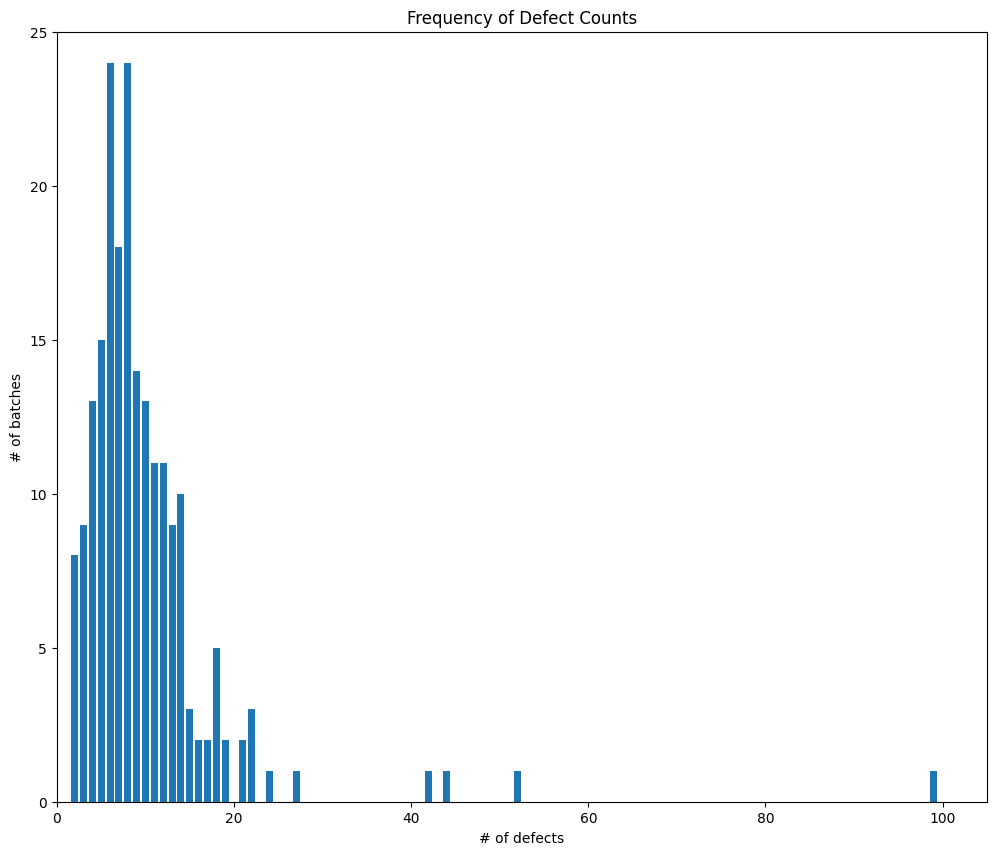

In [23]:
plt.figure(figsize=(12, 10))
plt.bar(x_values, y_values)
plt.axis([0, 105, 0, 25])
plt.title('Frequency of Defect Counts')
plt.xlabel('# of defects')
plt.ylabel('# of batches')
plt.show()

In [24]:
num_points = len(num_defects)

print('Number of data points: ', num_points)

largest_value = max(num_defects)
smallest_value = min(num_defects)

print('Largest value: ', largest_value)
print('Smallest value: ', smallest_value)

Number of data points:  204
Largest value:  99
Smallest value:  2


In [25]:
def median(values):
    sorted_values = sorted(values)
    num = len(values)
    center = num // 2

    if num % 2 == 1:
        # return the center value if n is odd
        return sorted_values[center]
    else:
        c1 = center - 1
        c2 = center
        return (sorted_values[c1] + sorted_values[c2]) / 2

In [28]:
odd = [1, 2, 3]
print('median of odd: ', median(odd))

even = [42, 1, 5, 6]
print('median of even: ', median(even))

print('median of defects: ', median(num_defects))

median of odd:  2
median of even:  5.5
median of defects:  8.0


In [29]:
def mode(values):
    mode_values = {}
    counts = Counter(values)
    max_value = max(counts.values())

    return [value for value, count in counts.items() if count == max_value]

In [30]:
print('single most frequent: ', mode([1, 2, 3, 4, 4, 4]))
print('double most frequent: ', mode([1, 1, 1, 2, 3, 4, 5, 5, 5]))
print('most frequent in defects: ', mode(num_defects))

single most frequent:  [4]
double most frequent:  [1, 5]
most frequent in defects:  [8, 6]


In [34]:
def freq_table(values):
    frequencies = Counter(values)
    print('{:<10}\t{:<10}'.format('Value', 'Frequency'))

    for value, count in frequencies.most_common():
        print('{:<10}\t{:<10}'.format(value, count))

In [35]:
freq_table([7, 8, 9, 9, 9, 6, 6])
freq_table(num_defects)

Value     	Frequency 
9         	3         
6         	2         
7         	1         
8         	1         
Value     	Frequency 
8         	24        
6         	24        
7         	18        
5         	15        
9         	14        
10        	13        
4         	13        
11        	11        
12        	11        
14        	10        
13        	9         
3         	9         
2         	8         
18        	5         
22        	3         
15        	3         
21        	2         
19        	2         
17        	2         
16        	2         
99        	1         
52        	1         
42        	1         
44        	1         
27        	1         
24        	1         


In [36]:
def data_range(values):
    return max(values) - min(values)

In [37]:
data_range(num_defects)

97

In [38]:
#quantiles are a way to mitigate the susceptibility of the simple spread to outliers
def quantile(values, percentile):
    # index of quantile boundary is the length of the values times the percentile, coerced to an int
    p_index = int(len(values) * percentile)
    return sorted(values)[p_index]

In [40]:
print(quantile(grades1, .5))
print(quantile(grades2, .5))
print('25%: ', quantile(grades2, .25))
print('75%: ', quantile(grades2, .75))

85
85
25%:  67
75%:  91


In [41]:
for percent in [0.10, 0.25, 0.75, 0.90, 0.999]:
    q = quantile(num_defects, percent)
    print('Percent: {}\t{}'.format(percent, q))

Percent: 0.1	4
Percent: 0.25	6
Percent: 0.75	12
Percent: 0.9	16
Percent: 0.999	99


In [ ]:
def inter